In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import test data from file
arr = np.loadtxt('testdata.csv', delimiter=',', dtype=str, skiprows=1,max_rows=10)
print(arr[:,np.r_[1,:1]])

# x=arr[:,0]
# y=arr[:,1]
# x.astype(float)
# y.astype(float)


[['10.2707' '63.29']
 ['10.2707' '63.29']
 ['10.3923' '63.3768']
 ['10.3923' '63.3768']
 ['10.3923' '63.3768']
 ['10.3923' '63.3768']
 ['10.3923' '63.3768']
 ['10.3923' '63.3768']
 ['5.4455' '61.5828']
 ['5.4455' '61.5828']]


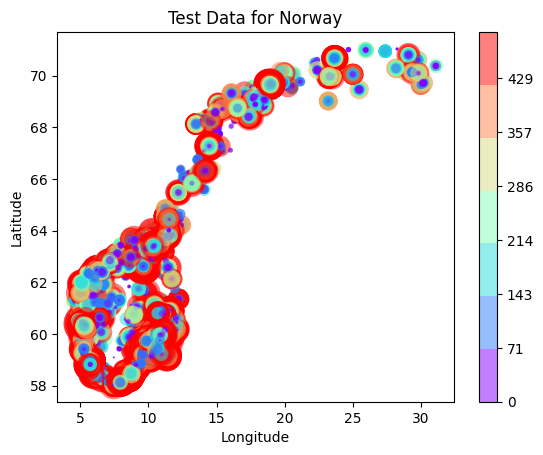

In [23]:
from random import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.graph_objects as go


df = pd.read_csv('testdata.csv', sep=',', nrows=1_400_000)
df.apply(pd.Series.explode).reset_index()
# print(df)
x = df['Long']
y = df['Lat']
z_Mbps = df['Mbps']
x.astype(float)
y.astype(float)

cmap=plt.cm.rainbow
norm=colors.BoundaryNorm(np.arange(0, 500, 70), cmap.N)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Test Data for Norway')
plt.scatter(x, y, s=z_Mbps/2,c=z_Mbps,cmap=cmap,norm=norm,edgecolors='none', alpha=0.5)
plt.colorbar(ticks=np.linspace(0, 1000, 15))
plt.show()

#fig = go.Figure(data=go.Scattergeo(
#        lon = x,
#        lat = y,
#        text = z_Mbps,
#        mode = 'markers',
#        marker_color = z_Mbps,
#        ))
#fig.update_layout(
#    title = 'Test Data for Norway',
#    geo_scope='europe',
#    showlegend=False,
#    )

#fig.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from matplotlib import colors
import plotly.graph_objects as go
import folium
from folium import plugins
import math

df = pd.read_csv('testdata.csv', sep=',', nrows=1_400_000) # Husk å endre på antall rader her
df.apply(pd.Series.explode).reset_index()
df.fillna(0, inplace=True)

#print("Datashape:", df.shape)
# print(df)


z_Mbps = df['Mbps']
x = df['Long']
y = df['Lat']
x.astype(float)
y.astype(float)


X = np.array(list(zip(x, y))).reshape(len(x), 2)
kmeans = KMeans(n_clusters=700).fit(X, sample_weight=z_Mbps)
centroids = kmeans.cluster_centers_
# print(centroids)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Test Data for Norway')
#plt.scatter(x, y, c='black', s=7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)
# plt.show()

# fig = go.Figure(data=go.Scattergeo(
#     lon=centroids[:, 0],
#     lat=centroids[:, 1],
#     text=z_Mbps,
#     mode='markers',
# ))
# fig.update_layout(
#     title='Test Data for Norway',
#     geo_scope='europe',
#     showlegend=False,
# )
# m=folium.Map(location=[60.4720, 8.4689], zoom_start=5)
# for i in range(len(centroids)):
#     folium.Marker([centroids[i][1], centroids[i][0]], popup=str(z_Mbps[i])).add_to(m)
# m.save('map.html')

#create heatmap
m = folium.Map(location=[60.4720, 8.4689], zoom_start=5)
m.add_child(plugins.HeatMap([[centroids[i][1], centroids[i][0]] for i in range(len(centroids))], radius=20))
m.save('map.html')



KeyboardInterrupt: 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from matplotlib import colors
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier

# Husk å endre på antall rader her
df = pd.read_csv('testdata.csv', sep=',', nrows=700_000)

# df.apply(pd.Series.explode).reset_index()

df.fillna(0, inplace=True)


# New dataframe with only the columns we want
newDataFrame = df[['Long', 'Lat']]
print(newDataFrame)
newDataFrame.dtypes


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X,y)
#grr = pd.plotting.scatter_matrix(df, c=z_Mbps, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Test set predictions:\n ",knn.predict(X_test))

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))



KeyError: "None of [Index(['Long', 'Lat'], dtype='object')] are in the [columns]"

[[ 68.15922925]
 [ 76.74448085]
 [  8.08855603]
 ...
 [164.88525995]
 [ 41.36812559]
 [ 29.9274834 ]] 0          15.857
1          16.194
2          23.036
3          21.898
4          20.000
            ...  
1048570    18.606
1048571    15.897
1048572    15.636
1048573    18.912
1048574    14.150
Name: MinRTT, Length: 1046925, dtype: float64


Test set predictions:
  [15.15632 19.9968  18.17038 ... 17.18846 27.39688 15.96298]
Test set accuracy: 0.13


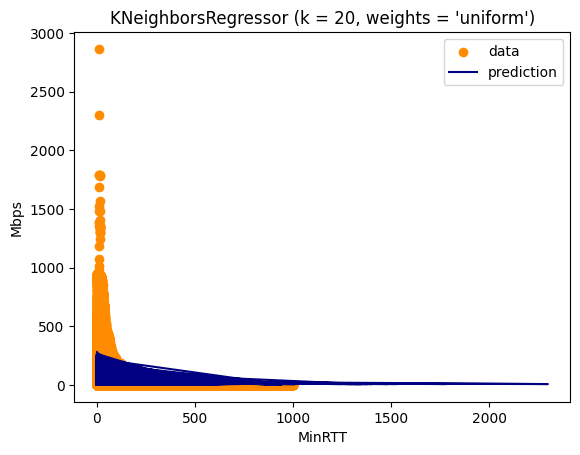

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from matplotlib import colors
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestCentroid, RadiusNeighborsRegressor
from sklearn import linear_model


# Use MinRTT to predict Mbps
names = ['Lat', 'Long', 'City', 'PostalCode', 'Accuracy',	'CountryCode', 'Mbps',	'StartTime',
         'Endtime', 'UUID', 'TestTime',	'CongestionControl', 'MeanThroughputMbps',	'MinRTT', 'LossRate']
dataframe = pd.read_csv('testdata.csv', sep=',', nrows=1_400_000, names=names)
dataframe.fillna(0, inplace=True)

# Drop values that are 4294967.295 in MinRTT
#index_names = dataframe[dataframe['MinRTT'] < 400_000].index
#dataframe.drop(index_names, inplace=True)

# New dataframe with only the columns we want
newDataFrame = dataframe[['MinRTT', 'Mbps']]
newDataFrame = newDataFrame[newDataFrame['MinRTT'] < 1000]
newDataFrame.to_numpy()

#Show highest values for MinRTT and Mbps
#print(newDataFrame.nlargest(10, 'MinRTT'))
#print("\n")
X = newDataFrame['Mbps'].values.reshape(-1, 1)

y = newDataFrame['MinRTT']

print(X,  y)
print("\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)


knn = KNeighborsRegressor(n_neighbors=50, weights = 'uniform')
knn.fit(X_train, y_train)

print("Test set predictions:\n ",knn.predict(X_test))
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

# Plot the results
y_ = knn.predict(X_test)

plt.scatter(y, X, color='darkorange', label='data')
plt.plot(X_test, y_, color='navy', label='prediction')
#plt.axis('tight')
plt.legend()
plt.ylabel('Mbps')
plt.xlabel('MinRTT')
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (20, 'uniform'))
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from matplotlib import colors
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier


# Use MinRTT to predict Mbps
df = pd.read_csv('testdata.csv', sep=',', nrows=700_000)
df.apply(pd.Series.explode).reset_index()
df.fillna(0, inplace=True)

# New dataframe with only the columns we want
newDataFrame = df[['MinRTT', 'Mbps']]
print(newDataFrame)
newDataFrame.dtypes

# Create feature and target arrays
X = newDataFrame['MinRTT']
y = newDataFrame['Mbps']
# Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

#Plot MinRTT vs Mbps
plt.scatter(X, y, c='black', s=7)
plt.xlabel('MinRTT')
plt.ylabel('Mbps')
plt.title('MinRTT vs Mbps')
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from matplotlib import colors
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier

# Use KMeans to predict if a point is in a City or not
df = pd.read_csv('testdata - Copy.csv', sep=',', nrows=700_000)
df.apply(pd.Series.explode).reset_index()
df.fillna(0, inplace=True)

# New dataframe with only the columns we want
newDataFrame = df[['Long', 'Lat', 'City']]
print(newDataFrame)
newDataFrame.dtypes

# Create feature and target arrays
X = newDataFrame['Long', 'Lat']
y = newDataFrame['City']
# Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

TypeError: Memory.__init__() got an unexpected keyword argument 'cachedir'

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from matplotlib import colors
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier

# Use KMeans to predict if a point is in a City or not
df = pd.read_csv('testdata.csv', sep=',', nrows=700_000)
df.apply(pd.Series.explode).reset_index()
df.fillna(0, inplace=True)


# Create feature and target arrays
x = df.iloc[:,[0, 1]]
y = df.iloc[:,[2]]

print (x)
print ("\n")
print (y)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


          63.29  10.2707
0       63.2900  10.2707
1       63.3768  10.3923
2       63.3768  10.3923
3       63.3768  10.3923
4       63.3768  10.3923
...         ...      ...
699995  60.8019  10.6748
699996  60.8019  10.6748
699997  59.9550  10.8590
699998  59.9550  10.8590
699999  60.7817  10.6185

[700000 rows x 2 columns]


           Melhus
0          Melhus
1          Tiller
2          Tiller
3          Tiller
4          Tiller
...           ...
699995     Gjøvik
699996     Gjøvik
699997       Oslo
699998       Oslo
699999  Hunndalen

[700000 rows x 1 columns]


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [3]:
import feather 
import pandas as pd
import numpy as np
# Convert to feather format
df = pd.read_csv('testdata.csv', sep=',', nrows=700_000)
df.apply(pd.Series.explode).reset_index()

feather.write_dataframe(df, 'testdata.feather')

df=feather.read_dataframe('testdata.feather')

print(df)


          63.29  10.2707     Melhus    7224  5  NO  68.159229245045807  \
0       63.2900  10.2707     Melhus  7224.0  5  NO           76.744481   
1       63.3768  10.3923     Tiller  7075.0  1  NO            8.088556   
2       63.3768  10.3923     Tiller  7075.0  1  NO           27.124351   
3       63.3768  10.3923     Tiller  7075.0  1  NO            8.266963   
4       63.3768  10.3923     Tiller  7075.0  1  NO           57.903311   
...         ...      ...        ...     ... ..  ..                 ...   
699995  60.8019  10.6748     Gjøvik  2819.0  5  NO          207.581933   
699996  60.8019  10.6748     Gjøvik  2819.0  5  NO           20.898985   
699997  59.9550  10.8590       Oslo   357.0  1  NO           31.951640   
699998  59.9550  10.8590       Oslo   357.0  1  NO           26.284199   
699999  60.7817  10.6185  Hunndalen  2827.0  5  NO          205.285766   

        2020-05-17 20:08:11.283101 UTC  2020-05-17 20:08:21.299873 UTC  \
0       2020-05-17 20:08:21.395899 UT